### Overall analysis and conclusions

#### Did Women’s participation in the Olympic Games change over the years?

When we review historical events that have occurred throughout the USA we wanted to know if they correlated with women’s participation in the Olympics and if its participation had changed over time. Historical events such as women’s right to vote, equal pay, and the women’s rights movement, correlates with the increase in women’s participation throughout the 1900s on to recent years.

We also wanted to analyze other world nation’s participation in the Olympics and if these events also correlated with change in women's participation. China had gone through historical events such as their Civil War during 1945-49, Russia had their Russian Revolution in 1917 along with their Soviet Union rule, and Japan had dealt with the aftermath of WWII. Overall, we did see a variation in participation throughout the 1900s on to recent years and noticed that women’s participation had increased in the recent years. This increase could be in correlation with the overall cultural shift for more women’s rights and equality.

It can be concluded for this observation that historical events do appear to correlate with Olympic participation, but we also know that we have limitations. There are many factors to take into consideration such as the variety in historical events, cultural shifts, and the rise and fall of governments and regimes.

As women continue to push for equality it would be interesting to analyze if women’s participation will eventually outgrow men’s participation in the coming years. 

Numerical Values for USA using describe<br> 
Total Years of Participation – Men: 35, Women: 31<br> 
Average Participation – Men: 201, Women: 84<br>
Standard Deviation – Men: 119, Women: 63<br>
Minimum Participation – Men: 14 (1896), Women: 6 (1904)<br>
Maximum Participation – Men: 508 (1904), Women: 195 (1996)<br>

Numerical Values for China using describe <br>
Total Years of Participation – Men: 19, Women: 18<br>
Average Participation – Men: 62, Women: 73<br>
Standard Deviation – Men: 60, Women: 64<br>
Minimum Participation – Men: 1 (1932), Women: 1 (1948)<br>
Maximum Participation – Men: 236 (2008), Women: 180 (2004)<br>

Numerical Values for Russia using describe <br>
Total Years of Participation – Men: 16, Women: 13<br>
Average Participation – Men: 88, Women: 77<br>
Standard Deviation – Men: 63, Women: 53<br>
Minimum Participation – Men: 2 (1924), Women: 1 (1924)<br>
Maximum Participation – Men: 231 (1996), Women: 158 (1996)<br>

Numerical Values for Japan using describe <br>
Total Years of Participation – Men: 29, Women: 26<br>
Average Participation – Men: 95, Women: 48<br>
Standard Deviation – Men: 65, Women: 37<br>
Minimum Participation – Men: 2 (1912), Women: 1 (1928, 1980)<br>
Maximum Participation – Men: 247 (1964), Women: 121 (2004)<br>

In [1]:
## list of sports for both men and women:
#Athletics, Gymnastics, Alpine Skiing, Cross Country Skiing, Rowing, Sailing, Shooting, Swimming, Wrestling
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

### The data clean up

In [2]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#Viewing the columns
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
#Selecting the columns
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team', 'NOC',
                                'Year', 'Sport', 'Event', 'Medal']]
starter_olympics_df.head()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,China,CHN,1992,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,CHN,2012,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
#Reviewing all olympic years
olympics_sorting = starter_olympics_df.sort_values(by=['Year'])
olympics_list = olympics_sorting.drop_duplicates(subset=['Year'])
olympics_list
olympic_years = olympics_list.loc[:, ['Year']]
olympic_years.head()

,Year
214333,1896
257686,1900
243548,1904
184283,1906
26677,1908


### Organizing content to compare women vs. men in the USA

In [6]:


#Select only USA participants
usa_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "USA")]
usa_filter.head()

#drop duplicates based off of the name
usa_clean = usa_filter.drop_duplicates(subset=['Name'])
usa_clean.head()

#Checking for any Nan values on columns to be used
#usa_clean['NOC'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
10,Per Knut Aaland,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
18,John Aalberg,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
186,Stephen Anthony Abas,M,26.0,United States,USA,2004,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
273,"David ""Dave"" Abbott",M,26.0,United States,USA,1928,Athletics,"Athletics Men's 5,000 metres",NaN
276,Jeremy Abbott,M,24.0,United States,USA,2010,Figure Skating,Figure Skating Men's Singles,NaN


In [7]:
#Creating seperate data frames for men and women to then plot on line plot
usa_women = usa_clean[(usa_clean['Sex'] == "F")]
usa_women_counts = usa_women.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('F')].count())
usa_women_counts_df = pd.DataFrame(data=usa_women_counts)
final_women_counts = usa_women_counts_df.reset_index()
final_women_counts.head()


usa_men = usa_clean[(usa_clean['Sex'] == "M")]
usa_men_counts = usa_men.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('M')].count())
usa_men_counts_df = pd.DataFrame(data=usa_men_counts)
final_men_counts = usa_men_counts_df.reset_index()
final_men_counts.head()

,Year,Sex
0,1896,14
1,1900,66
2,1904,508
3,1906,20
4,1908,98


In [8]:
#using describe to find additional information
us_women_describe = final_women_counts['Sex'].describe()
us_women_summary = us_women_describe.astype(int)
us_women_summary

us_men_describe = final_men_counts['Sex'].describe()
us_men_summary = us_men_describe.astype(int)
us_men_summary


count     35
mean     201
std      119
min       14
25%       69
50%      222
75%      274
max      508
Name: Sex, dtype: int64

Text(0, 0.5, 'Participant Totals')

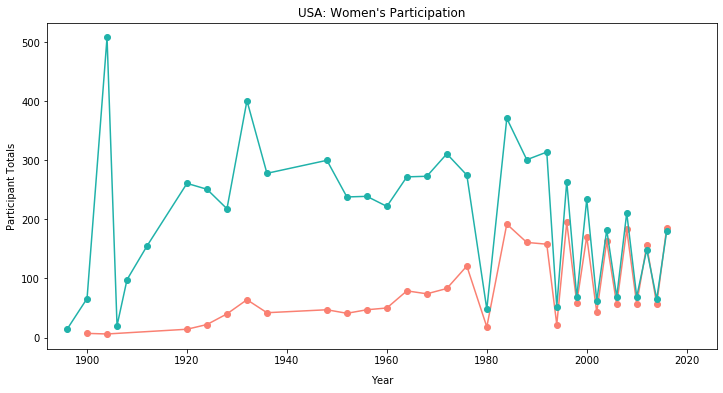

In [9]:
# Creating a line plot to compare women vs men in the USA

women_xaxis = final_women_counts["Year"]
women_yaxis = final_women_counts["Sex"]

men_xaxis = final_men_counts["Year"]
men_yaxis = final_men_counts["Sex"]

year_ticks = olympic_years["Year"]


#This will adjust the size of the plot line, gotta set the variable first
#and then adjust the height and width
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

women_line = plt.plot(women_xaxis, women_yaxis, marker ='o', color='salmon', label="Women",)
men_line = plt.plot(men_xaxis, men_yaxis, marker ='o', color='lightseagreen', label="Men")
#plt.xticks(year_ticks, year_ticks, rotation ='vertical')
#plt.figure(figsize=(8,10))
plt.xlim(1892, 2026)
plt.title("USA: Women's Participation")
plt.xlabel("Year", labelpad=10)
plt.ylabel("Participant Totals")
#plt.legend(loc="best")
#plt.savefig("Visualizations/usa-pop.png")
#plt.savefig("Visualizations/women-usa-pop.png")


#### Plot Notes: 
<p>In the USA Women's vs Men Participation plot we can observe that men joined the Olympics before women and women didn't really start to participate till the 1900s. If we compare the date of the 1920s when women's right to vote began, we can see an uptick in participation and steady continuation in growth. There is also an increase in participation in the 1960s which could have been influenced by the women's rights movement (women's liberation movement) of the 1960's and '70's. After the 1980s we can really see the largest growth compared to past dates and as we move on the 2000s, participation between men and women begins to align more closely.</p>

### How do other world powers compare to the US when it comes to women's participation?

#### Analyzing China

In [10]:
#Select only Chinese participants
chn_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "CHN")]
chn_filter.head()

#drop duplicates based off of the name
chn_clean = chn_filter.drop_duplicates(subset=['Name'])
chn_clean.head()

#Checking for any Nan values on columns to be used
#chn_clean['Name'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,China,CHN,1992,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,CHN,2012,Judo,Judo Men's Extra-Lightweight,NaN
1072,Abudoureheman,M,22.0,China,CHN,2000,Boxing,Boxing Men's Middleweight,NaN
2611,Ai Linuer,M,25.0,China,CHN,2004,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN
2612,Ai Yanhan,F,14.0,China,CHN,2016,Swimming,Swimming Women's 200 metres Freestyle,NaN


In [11]:
#Creating seperate data frames for men and women to then plot on line plot for China
chn_women = chn_clean[(chn_clean['Sex'] == "F")]
chn_women_counts = chn_women.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('F')].count())
chn_women_counts_df = pd.DataFrame(data=chn_women_counts)
chn_women_finals = chn_women_counts_df.reset_index()
chn_women_finals

chn_men = chn_clean[(chn_clean['Sex'] == "M")]
chn_men_counts = chn_men.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('M')].count())
chn_men_counts_df = pd.DataFrame(data=chn_men_counts)
chn_men_finals = chn_men_counts_df.reset_index()
chn_men_finals.head()

,Year,Sex
0,1932,1
1,1936,51
2,1948,29
3,1980,13
4,1984,141


In [12]:
#using describe to find additional information
chn_women_describe = chn_women_finals['Sex'].describe()
chn_women_summary = chn_women_describe.astype(int)
chn_women_summary

chn_men_describe = chn_men_finals['Sex'].describe()
chn_men_summary = chn_men_describe.astype(int)
chn_men_summary

count     19
mean      62
std       60
min        1
25%       13
50%       51
75%       94
max      236
Name: Sex, dtype: int64

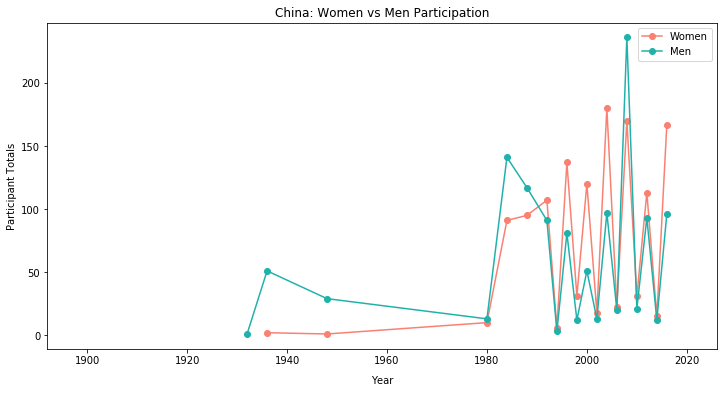

In [13]:
# Creating a line plot to compare women vs men in the China

chn_women_xaxis = chn_women_finals["Year"]
chn_women_yaxis = chn_women_finals["Sex"]

chn_men_xaxis = chn_men_finals["Year"]
chn_men_yaxis = chn_men_finals["Sex"]

#This will adjust the size of the plot line, gotta set the variable first
#and then adjust the height and width
chn = plt.figure()
chn.set_figwidth(12)
chn.set_figheight(6)

chn_women_line = plt.plot(chn_women_xaxis, chn_women_yaxis, marker ='o', color='salmon', label="Women",)
chn_men_line = plt.plot(chn_men_xaxis, chn_men_yaxis, marker ='o', color='lightseagreen', label="Men")
#plt.xticks(men_xaxis, men_xaxis, rotation ='vertical')
#plt.figure(figsize=(8,10))
plt.xlim(1892, 2026)
plt.title("China: Women vs Men Participation")
plt.xlabel("Year", labelpad=10)
plt.ylabel("Participant Totals")
plt.legend(loc="best")

#plt.savefig("Visualizations/chn-pop.png")

#### Plot Notes
Again, like the US chart, men were the first ones to begin participation in the Olympics and women soon followed. It can also be observed that both men and women didn't participate as much as the USA did. This could possibly be due to government restrictions depending on what was going on at the time and what types of rules the government had imposed. Participation didn't increase until the 1980s for both men and women and based on the line plot it can be observed that women were participating more than men at times during the late 1990s into the 2000s

If we examine historical events, China's late participation in the Olympics could possibly have been the result of China's civil war that took place between 1945 and 1949 and political turmoil that followed. Another thing to note is that Some of China's athletes have been banned for life or stripped of medals due to doping scandals. Culturally women continue to struggle with inequalities, this can be seen from past events where china has historically preferred men over women in which sons were preferred over daughters. There has been large feminist movements between the years of 2011 and 2015 that has allowed for more progress for equality in education, healthcare, and employment.

#### Analyzing Russia

In [14]:
#Select only Russian participants
rus_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "RUS")]
rus_filter.head()

#drop duplicates based off of the name
rus_clean = rus_filter.drop_duplicates(subset=['Name'])
rus_clean.head()

#Checking for any Nan values on columns to be used
#rus_clean['Name'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,Russia,RUS,2008,Athletics,Athletics Women's Javelin Throw,Silver
195,Tamila Rashidovna Abasova,F,21.0,Russia,RUS,2004,Cycling,Cycling Women's Sprint,Silver
615,Adlan Aliyevich Abdurashidov,M,26.0,Russia,RUS,2016,Boxing,Boxing Men's Lightweight,NaN
779,Inga Eduardovna Abitova,F,26.0,Russia,RUS,2008,Athletics,"Athletics Women's 10,000 metres",NaN
788,Denis Mikhaylovich Ablyazin,M,19.0,Russia,RUS,2012,Gymnastics,Gymnastics Men's Team All-Around,NaN


In [15]:
#Creating seperate data frames for men and women to then plot on line plot for China
rus_women = rus_clean[(rus_clean['Sex'] == "F")]
rus_women_counts = rus_women.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('F')].count())
rus_women_counts_df = pd.DataFrame(data=rus_women_counts)
rus_women_finals = rus_women_counts_df.reset_index()
rus_women_finals

rus_men = rus_clean[(rus_clean['Sex'] == "M")]
rus_men_counts = rus_men.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('M')].count())
rus_men_counts_df = pd.DataFrame(data=rus_men_counts)
rus_men_finals = rus_men_counts_df.reset_index()
rus_men_finals

,Year,Sex
0,1900,4
1,1908,6
2,1912,158
3,1924,2
4,1994,75
5,1996,231
6,1998,63
7,2000,152
8,2002,51
9,2004,137


In [16]:
#using describe to find additional information
rus_women_describe = rus_women_finals['Sex'].describe()
rus_women_summary = rus_women_describe.astype(int)
rus_women_summary

rus_men_describe = rus_men_finals['Sex'].describe()
rus_men_summary = rus_men_describe.astype(int)
rus_men_summary

count     16
mean      88
std       63
min        2
25%       52
50%       77
75%      136
max      231
Name: Sex, dtype: int64

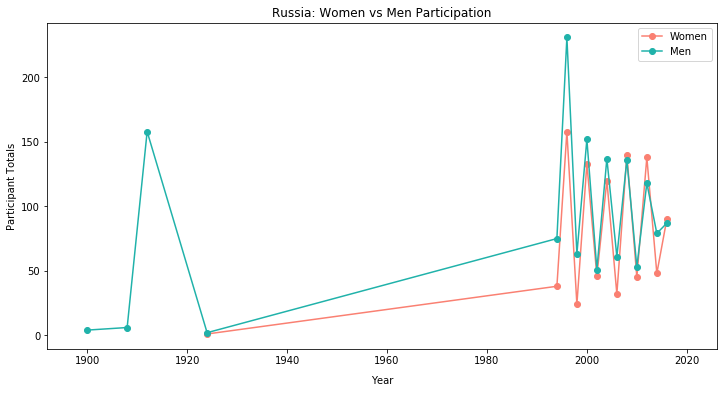

In [17]:
# Creating a line plot to compare women vs men in the Russia

rus_women_xaxis = rus_women_finals["Year"]
rus_women_yaxis = rus_women_finals["Sex"]

rus_men_xaxis = rus_men_finals["Year"]
rus_men_yaxis = rus_men_finals["Sex"]

#This will adjust the size of the plot line, gotta set the variable first
#and then adjust the height and width
rus = plt.figure()
rus.set_figwidth(12)
rus.set_figheight(6)

rus_women_line = plt.plot(rus_women_xaxis, rus_women_yaxis, marker ='o', color='salmon', label="Women",)
rus_men_line = plt.plot(rus_men_xaxis, rus_men_yaxis, marker ='o', color='lightseagreen', label="Men")
#plt.xticks(men_xaxis, men_xaxis, rotation ='vertical')
#plt.figure(figsize=(8,10))
plt.xlim(1892, 2026)
plt.title("Russia: Women vs Men Participation")
plt.xlabel("Year", labelpad=10)
plt.ylabel("Participant Totals")
plt.legend(loc="upper right")

#plt.savefig("Visualizations/rus-pop.png")

#### Plot Notes:
Based on Russia’s line chart for women versus men, Russian men began their participation in the 1900s and women didn’t begin to participate until 1924. Then a large gap occurred from then till about 1994. This large gap could correlate to the Russian Revolution and the Soviet Union regime. Russia was again able to formally compete under their name in 1994 but as the years followed, they have been through several suspensions and bans due to doping scandals which could have affected their participation rates.  

Russian women are still currently pushing for more progress, in the past during the Bolshevick Revolution, women were granted rights, including suffrage in 1917. Later on, in the Constitution of Russia, equal rights was granted for men and women 1993. Russian women are still currently fighting inequality and pushing for more access in the employment/professional industries. Because women are barred from job opportunities and are paid much less than men, this has led them to struggles in poverty. In 2019, the country has passed reforms to allow women to have more employment opportunities but will not be possible until the year 2021.

#### Analyzing Japan

In [18]:
#Select only Japanese participants
jpn_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "JPN")]
jpn_filter.head()

#drop duplicates based off of the name
jpn_clean = jpn_filter.drop_duplicates(subset=['Name'])
jpn_clean.head()

#Checking for any Nan values on columns to be used
#jpn_clean['Name'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
625,Isao Ko Abe,M,24.0,Japan,JPN,1936,Athletics,Athletics Men's Hammer Throw,NaN
626,Kazumi Abe,M,24.0,Japan-1,JPN,1972,Bobsleigh,Bobsleigh Men's Two,NaN
630,Kazuo Abe,M,25.0,Japan,JPN,1960,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN
631,Kinya Abe,M,23.0,Japan,JPN,1992,Fencing,"Fencing Men's Foil, Individual",NaN
632,Kiyoshi Abe,M,25.0,Japan,JPN,1972,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN


In [19]:
#Creating seperate data frames for men and women to then plot on line plot for Japan
jpn_women = jpn_clean[(jpn_clean['Sex'] == "F")]
jpn_women_counts = jpn_women.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('F')].count())
jpn_women_counts_df = pd.DataFrame(data=jpn_women_counts)
jpn_women_finals = jpn_women_counts_df.reset_index()
jpn_women_finals

jpn_men = jpn_clean[(jpn_clean['Sex'] == "M")]
jpn_men_counts = jpn_men.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('M')].count())
jpn_men_counts_df = pd.DataFrame(data=jpn_men_counts)
jpn_men_finals = jpn_men_counts_df.reset_index()
jpn_men_finals.head()

,Year,Sex
0,1912,2
1,1920,14
2,1924,17
3,1928,42
4,1932,145


In [20]:
#using describe to find additional information
jpn_women_describe = jpn_women_finals['Sex'].describe()
jpn_women_summary = jpn_women_describe.astype(int)
jpn_women_summary

jpn_men_describe = jpn_men_finals['Sex'].describe()
jpn_men_summary = jpn_men_describe.astype(int)
jpn_men_summary

count     29
mean      95
std       65
min        2
25%       27
50%       94
75%      145
max      247
Name: Sex, dtype: int64

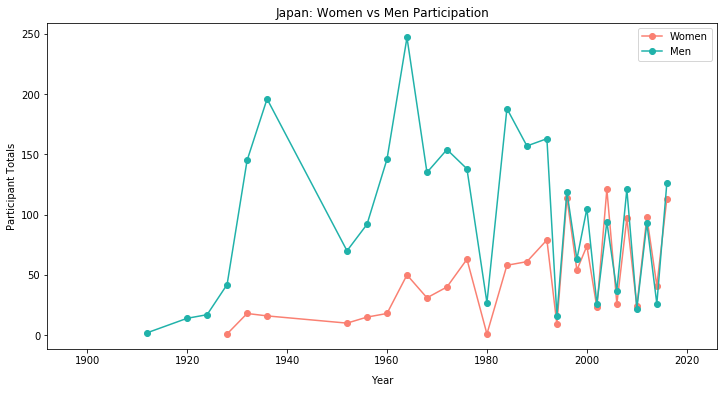

In [21]:
# Creating a line plot to compare women vs men in the Russia

jpn_women_xaxis = jpn_women_finals["Year"]
jpn_women_yaxis = jpn_women_finals["Sex"]

jpn_men_xaxis = jpn_men_finals["Year"]
jpn_men_yaxis = jpn_men_finals["Sex"]

#This will adjust the size of the plot line, gotta set the variable first
#and then adjust the height and width
jpn = plt.figure()
jpn.set_figwidth(12)
jpn.set_figheight(6)

jpn_women_line = plt.plot(jpn_women_xaxis, jpn_women_yaxis, marker ='o', color='salmon', label="Women",)
jpn_men_line = plt.plot(jpn_men_xaxis, jpn_men_yaxis, marker ='o', color='lightseagreen', label="Men")
#plt.xticks(men_xaxis, men_xaxis, rotation ='vertical')
#plt.figure(figsize=(8,10))
plt.xlim(1892, 2026)
plt.title("Japan: Women vs Men Participation")
plt.xlabel("Year", labelpad=10)
plt.ylabel("Participant Totals")
plt.legend(loc="upper right")

#plt.savefig("Visualizations/jpn-pop.png")

#### Plot Notes:
For Japan’s line plot, men began participating in the Olympics before women starting in 1912. Women didn’t begin to participate until 1928 with one participant. As time progressed women’s participation increased which could correlate to the women’s rights women that began in the 1920s. As we move closer to modern years such as after the 2000s, we see that women’s participation begins to align more closely to men’s participation. 

Japan provided suffrage primarily only to men, this then eventually then led Japanese women to fight for women’s suffrage in the 1920s by creating the New Women’s Association to improve women’s welfare and status.  This movement allowed for the continuous growth in various organizations that would help the fight for women’s rights. Japan decided to grant equal suffrage to both men and women in 1945. This same year women were granted the right to vote. In 1946, 39 women were elected for the first time to be part of the House of Representatives. Although progress has grown in Japan women continue to struggle with the expectation to be a housewife. Because the government stresses the importance of family and wifely duties, many women struggle to decide on whether to give up their career to take care of the home or to continue with their career and completely give up on becoming a wife/mother.